In [9]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")



# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [10]:
# Load the dataset
file_path = r"C:\Users\hp\Downloads\disney_plus_titles.csv"
disney_data = pd.read_csv(file_path)



In [12]:
disney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1368 non-null   object
 1   type          1368 non-null   object
 2   title         1368 non-null   object
 3   director      928 non-null    object
 4   cast          1194 non-null   object
 5   country       1193 non-null   object
 6   date_added    1365 non-null   object
 7   release_year  1368 non-null   int64 
 8   rating        1366 non-null   object
 9   duration      1368 non-null   object
 10  listed_in     1368 non-null   object
 11  description   1368 non-null   object
dtypes: int64(1), object(11)
memory usage: 128.4+ KB


In [14]:
disney_data.describe()

,release_year
count,1368.000000
mean,2002.348684
std,22.127559
min,1928.000000
25%,1998.000000
50%,2011.000000
75%,2018.000000
max,2021.000000


In [15]:
# Convert 'date_added' to datetime format
disney_data['date_added'] = pd.to_datetime(disney_data['date_added'])

# Handling missing values
disney_data['director'].fillna('Unknown', inplace=True)
disney_data['cast'].fillna('Unknown', inplace=True)
disney_data['country'].fillna('Unknown', inplace=True)

# Check for any remaining missing values
missing_values = disney_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      3
release_year    0
rating          2
duration        0
listed_in       0
description     0
dtype: int64


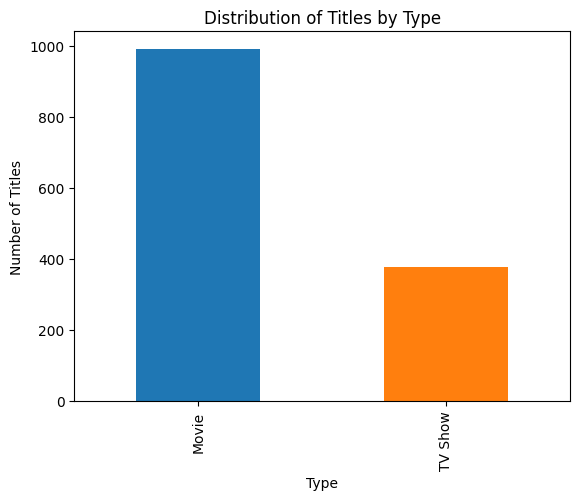

In [16]:
type_distribution = disney_data['type'].value_counts()
type_distribution.plot(kind='bar', title='Distribution of Titles by Type', color=['#1f77b4', '#ff7f0e'])
plt.xlabel('Type')
plt.ylabel('Number of Titles')
plt.show()


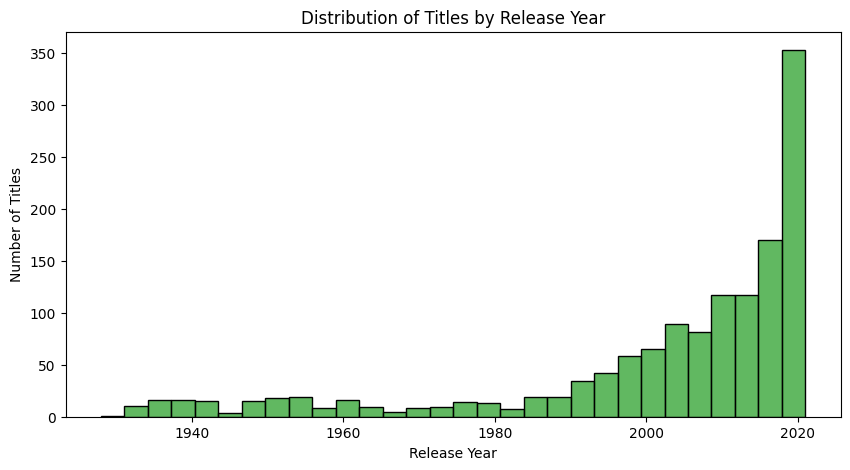

In [17]:
plt.figure(figsize=(10, 5))
sns.histplot(disney_data['release_year'], bins=30, kde=False, color='#2ca02c')
plt.title('Distribution of Titles by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()


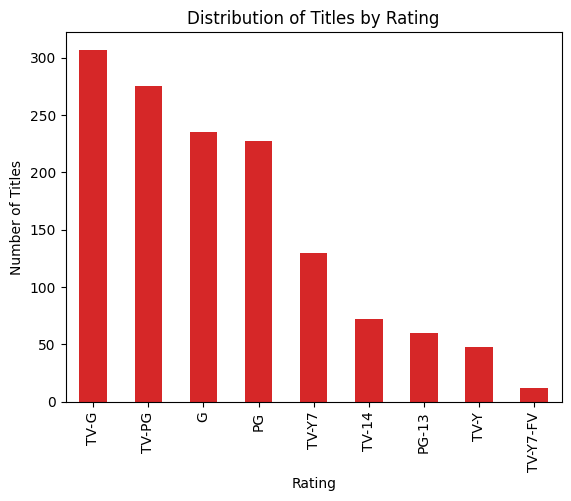

In [18]:
rating_distribution = disney_data['rating'].value_counts()
rating_distribution.plot(kind='bar', title='Distribution of Titles by Rating', color='#d62728')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.show()


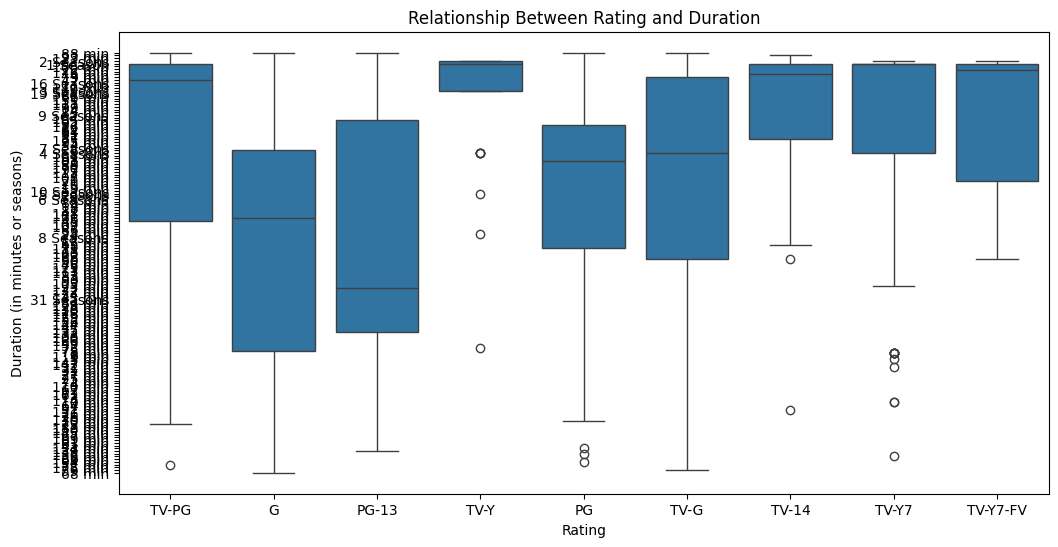

In [19]:
# Since duration has different units (minutes for movies, seasons for TV shows),
# this visualization needs careful interpretation.
plt.figure(figsize=(12, 6))
sns.boxplot(x='rating', y='duration', data=disney_data)
plt.title('Relationship Between Rating and Duration')
plt.xlabel('Rating')
plt.ylabel('Duration (in minutes or seasons)')
plt.show()


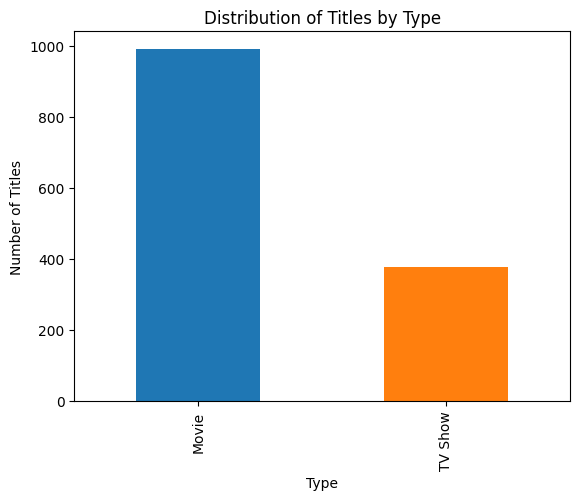

In [20]:
# 1. Distribution of Titles by Type (Movie/TV Show)
type_distribution = disney_data['type'].value_counts()
type_distribution.plot(kind='bar', title='Distribution of Titles by Type', color=['#1f77b4', '#ff7f0e'])
plt.xlabel('Type')
plt.ylabel('Number of Titles')
plt.show()

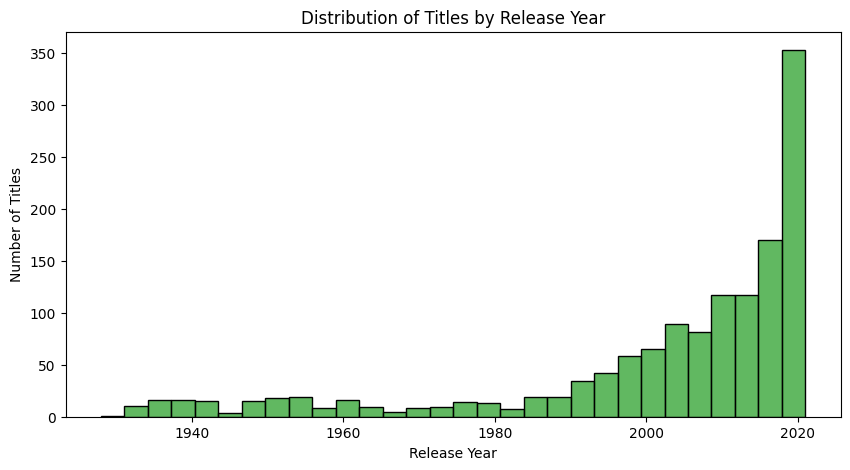

In [21]:
# 2. Distribution of Titles by Release Year
plt.figure(figsize=(10, 5))
sns.histplot(disney_data['release_year'], bins=30, kde=False, color='#2ca02c')
plt.title('Distribution of Titles by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()

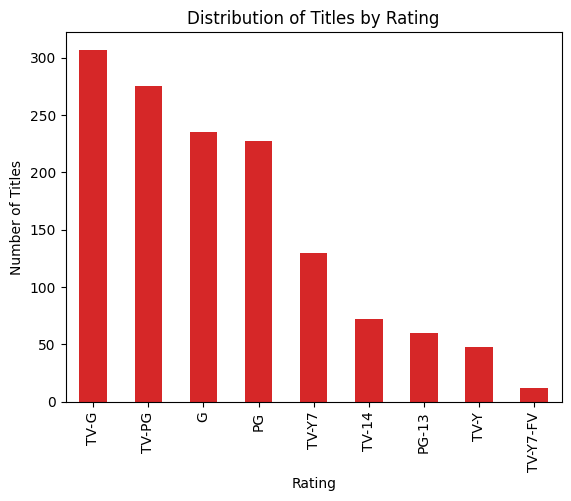

In [22]:
# 3. Distribution of Titles by Rating
rating_distribution = disney_data['rating'].value_counts()
rating_distribution.plot(kind='bar', title='Distribution of Titles by Rating', color='#d62728')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.show()

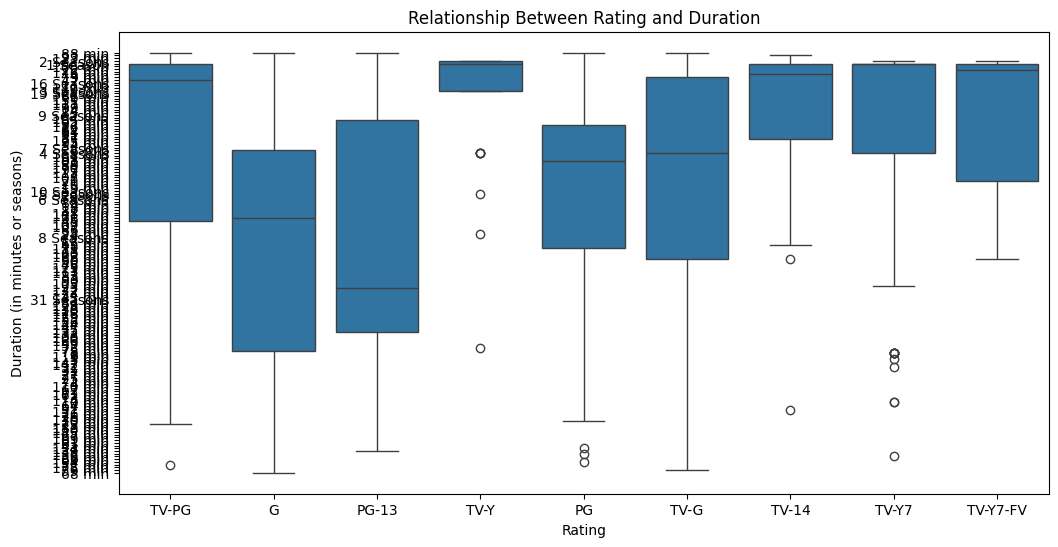

In [23]:

# 4. Relationship Between Rating and Duration
plt.figure(figsize=(12, 6))
sns.boxplot(x='rating', y='duration', data=disney_data)
plt.title('Relationship Between Rating and Duration')
plt.xlabel('Rating')
plt.ylabel('Duration (in minutes or seasons)')
plt.show()

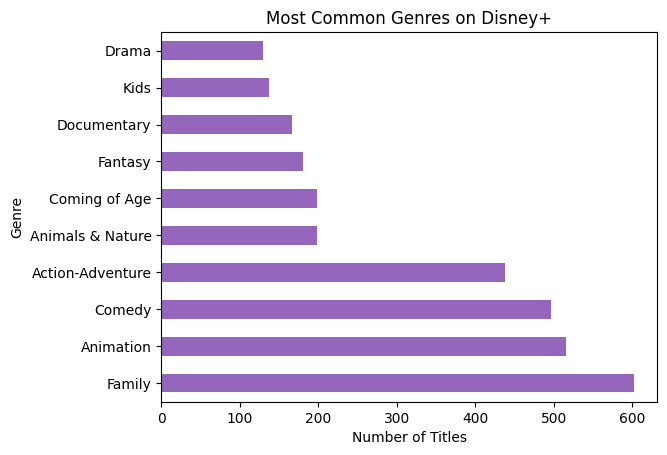

In [24]:
# 5. Most Common Genres
genres = disney_data['listed_in'].str.split(', ')
genres = genres.explode()
most_common_genres = genres.value_counts().head(10)

most_common_genres.plot(kind='barh', title='Most Common Genres on Disney+', color='#9467bd')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

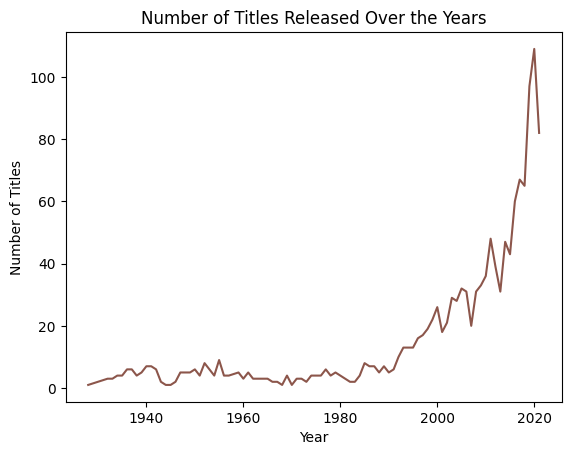

In [25]:
# 6. Number of Titles Released Over the Years
titles_per_year = disney_data['release_year'].value_counts().sort_index()
titles_per_year.plot(kind='line', title='Number of Titles Released Over the Years', color='#8c564b')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

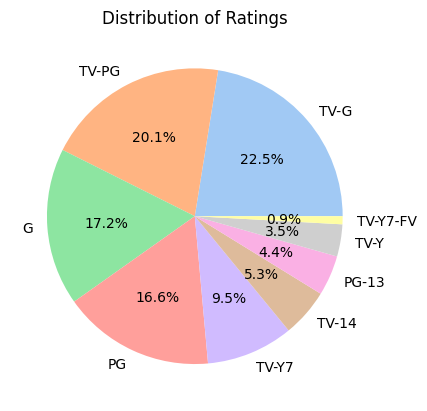

In [26]:
# 7. Most Common Ratings
most_common_ratings = disney_data['rating'].value_counts()
most_common_ratings.plot(kind='pie', autopct='%1.1f%%', title='Distribution of Ratings', colors=sns.color_palette('pastel'))
plt.ylabel('')
plt.show()

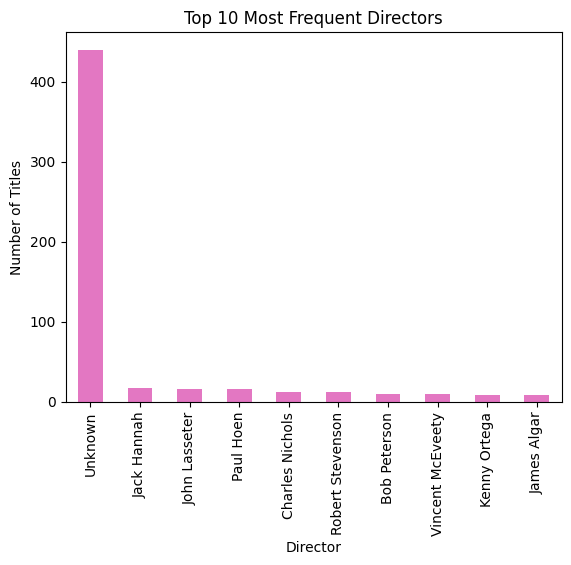

In [27]:
# 8. Most Frequent Directors
most_frequent_directors = disney_data['director'].value_counts().head(10)
most_frequent_directors.plot(kind='bar', title='Top 10 Most Frequent Directors', color='#e377c2')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.show()

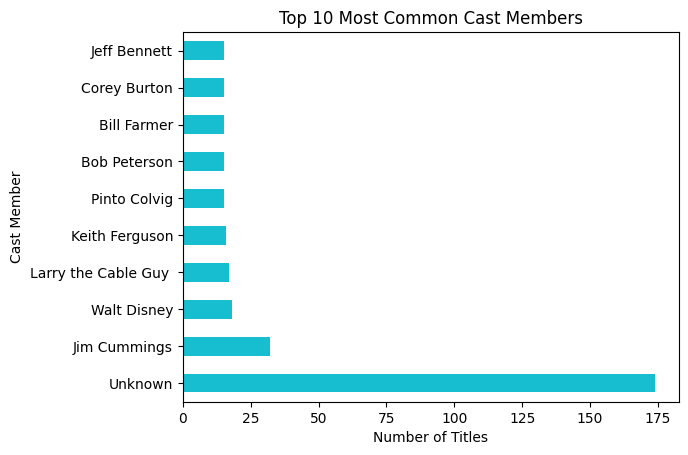

In [28]:
# 9. Most Common Cast Members
cast_members = disney_data['cast'].str.split(', ')
cast_members = cast_members.explode()
most_common_cast = cast_members.value_counts().head(10)

most_common_cast.plot(kind='barh', title='Top 10 Most Common Cast Members', color='#17becf')
plt.xlabel('Number of Titles')
plt.ylabel('Cast Member')
plt.show()